In [1]:
import pandas as pd
import pymongo
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용
import scipy
import scipy.stats as stats

# client=pymongo.MongoClient("trainings.iptime.org",48003)
client=pymongo.MongoClient("192.168.10.240",27017)
db= client['AI_LKJ']
tour_pass_review = db['data_tour_pass_review']
tour_pass_review = tour_pass_review.find()
tour_pass_review = pd.DataFrame(tour_pass_review)
data_tour_pass_review_tmon = db['data_tour_pass_review_tmon']
data_tour_pass_review_tmon = data_tour_pass_review_tmon.find()
data_tour_pass_review_tmon = pd.DataFrame(data_tour_pass_review_tmon)

In [2]:
df_tour_pass_review = pd.concat(objs=[tour_pass_review,data_tour_pass_review_tmon])

# tour_pass_review['date'] = tour_pass_review['date'][:4]

# 데이터 전처리

## 날짜 형식 변환

In [3]:
def date_format(raw):
    raw = raw.split('.')
    raw = '20'+raw[0]+raw[1]
    return raw
def year(raw):
    raw = raw[:4]
    return raw
def month(raw):
    raw = raw[4:]
    return raw
def month(raw):
    raw = raw[4:]
    return raw
df_tour_pass_review.loc[:,'date_format'] = df_tour_pass_review['date'].apply(date_format)
df_tour_pass_review.loc[:,'year'] = df_tour_pass_review['date_format'].apply(year)
df_tour_pass_review.loc[:,'month'] = df_tour_pass_review['date_format'].apply(month)
df_tour_pass_review

,_id,title,region,rating,date,content,date_format,year,month
0,663dea3806635b047a688c55,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,5,24.03.24.,남편과 갑작스럽게 가게 된 여수여행 둘다 여수는 처음이라 어디를 가야할지 무엇을 해...,202403,2024,03
1,663dea3806635b047a688c56,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,4,24.04.29.,저렴한 가격에 여러군데 둘러 볼수있어 좋았어요.\n다만 문을 일찍 닫거나 영업시간이...,202404,2024,04
2,663dea3806635b047a688c57,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,5,24.04.24.,아이들과함께 즐거운 여행하고 왔습니다. 사진보시면 어디어디 갔는지 알수있구요. 1...,202404,2024,04
3,663dea3806635b047a688c58,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,5,24.04.15.,아주 좋네요\n김경오파티쓰리에서 바다보며 아아 한잔 하고요...그닥 친절하진 않았어...,202404,2024,04
4,663dea3806635b047a688c59,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,5,24.05.02.,처음 이용해보았는데 가성비좋은것같습니다. 주말에이용하는데 체험하고 활동하는것은 주말...,202405,2024,05
...,...,...,...,...,...,...,...,...,...
1040,663edc33cf0309091221da84,"[강원] 강릉제로패스\n하슬라아트월드,선교장 무료입장",강원,5,24.04.25.,너무 좋았습니다!! 매장마다 친절하셨고 커피도 맛있었어요,202404,2024,04
1041,663edc33cf0309091221da85,"[강원] 강릉제로패스\n하슬라아트월드,선교장 무료입장",강원,5,24.04.18.,좋습니딘좋아요ㄲㅎㄲㄱ,202404,2024,04
1042,663edc6111e8110b348ba7de,[주말에어디가] 전북투어패스\n남원춘향여행권,전북,5,24.03.24.,춘향테마파크가 운영을 안하고잇어서 아쉬웟네요,202403,2024,03
1043,663edc6111e8110b348ba7df,[주말에어디가] 전북투어패스\n남원춘향여행권,전북,5,24.03.07.,저럄하게 이용했어요 ㅎㅎ,202403,2024,03


In [4]:
def year_count(raw):
    if int(raw) <= 202202:
        year = 1
    elif int(raw) <= 202302:
        year = 2
    else:
        year = 3
    return year
df_tour_pass_review.loc[:,'year_count'] = df_tour_pass_review['date_format'].apply(year_count)


In [5]:
df_tour_pass_review

,_id,title,region,rating,date,content,date_format,year,month,year_count
0,663dea3806635b047a688c55,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,5,24.03.24.,남편과 갑작스럽게 가게 된 여수여행 둘다 여수는 처음이라 어디를 가야할지 무엇을 해...,202403,2024,03,3
1,663dea3806635b047a688c56,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,4,24.04.29.,저렴한 가격에 여러군데 둘러 볼수있어 좋았어요.\n다만 문을 일찍 닫거나 영업시간이...,202404,2024,04,3
2,663dea3806635b047a688c57,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,5,24.04.24.,아이들과함께 즐거운 여행하고 왔습니다. 사진보시면 어디어디 갔는지 알수있구요. 1...,202404,2024,04,3
3,663dea3806635b047a688c58,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,5,24.04.15.,아주 좋네요\n김경오파티쓰리에서 바다보며 아아 한잔 하고요...그닥 친절하진 않았어...,202404,2024,04,3
4,663dea3806635b047a688c59,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,5,24.05.02.,처음 이용해보았는데 가성비좋은것같습니다. 주말에이용하는데 체험하고 활동하는것은 주말...,202405,2024,05,3
...,...,...,...,...,...,...,...,...,...,...
1040,663edc33cf0309091221da84,"[강원] 강릉제로패스\n하슬라아트월드,선교장 무료입장",강원,5,24.04.25.,너무 좋았습니다!! 매장마다 친절하셨고 커피도 맛있었어요,202404,2024,04,3
1041,663edc33cf0309091221da85,"[강원] 강릉제로패스\n하슬라아트월드,선교장 무료입장",강원,5,24.04.18.,좋습니딘좋아요ㄲㅎㄲㄱ,202404,2024,04,3
1042,663edc6111e8110b348ba7de,[주말에어디가] 전북투어패스\n남원춘향여행권,전북,5,24.03.24.,춘향테마파크가 운영을 안하고잇어서 아쉬웟네요,202403,2024,03,3
1043,663edc6111e8110b348ba7df,[주말에어디가] 전북투어패스\n남원춘향여행권,전북,5,24.03.07.,저럄하게 이용했어요 ㅎㅎ,202403,2024,03,3


## 결측치 제거

In [6]:
df_tour_pass_review.isnull().sum()

_id            0
title          0
region         0
rating         0
date           0
content        5
date_format    0
year           0
month          0
year_count     0
dtype: int64

In [7]:
df_tour_pass_review = df_tour_pass_review.dropna()

## 2024년 3-5월 데이터 제거
- 3년치 데이터를 년도별로 비교하기 위해 202403부터 제거

In [8]:
df_tour_pass_review = df_tour_pass_review.query("date_format < '202403'")

# 데이터 확인

## 지역별 구매량
- 제주 > 전북 > 부산 > 강원 > 전남 > 충남

In [9]:
df_tour_pass_review['region'].value_counts()

region
제주    17425
전북     4108
부산     3789
강원     1047
전남      536
충남      187
Name: count, dtype: int64

In [10]:
df_tour_pass_review['date_format'].value_counts()

date_format
202208    1485
202308    1336
202206    1336
202310    1117
202401    1061
202402     992
202210     981
202209     955
202311     940
202211     939
202207     926
202312     917
202309     903
202205     887
202303     842
202302     830
202305     792
202212     760
202306     759
202301     709
202202     695
202203     677
202204     658
202201     640
202304     636
202307     628
202105     521
202111     509
202110     452
202112     411
202106     357
202109     350
202108     339
202107     331
202104     330
202103      91
Name: count, dtype: int64

## 투어패스 구매량의 변화 추이
- 월별로 구매량이 변화하기 때문에 월별 변화 추이를 확인해볼 필요가 있음

In [11]:
pivot_review = pd.pivot_table(df_tour_pass_review,index=['year_count','month','date_format','region'],values='content',aggfunc='count')
pivot_review = pivot_review.reset_index()

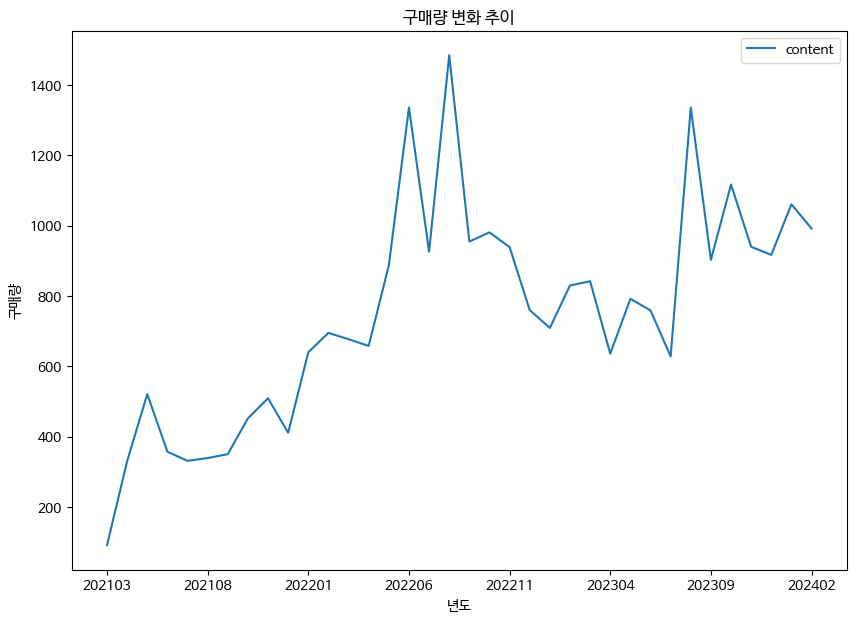

In [12]:
pivot_review_month = pd.pivot_table(pivot_review,index='date_format',values='content',aggfunc='sum')
ax = pivot_review_month.plot(kind='line',  figsize=(10, 7))

plt.title("구매량 변화 추이")
plt.xlabel("년도")	
plt.ylabel("구매량")	
plt.show()	


## 년차별 구매량 변화 추이
- 1년차에 비해 2년차에 구매량이 상당히 증가하였고 3년차에도 2년차와 비슷한 수준을 유지함

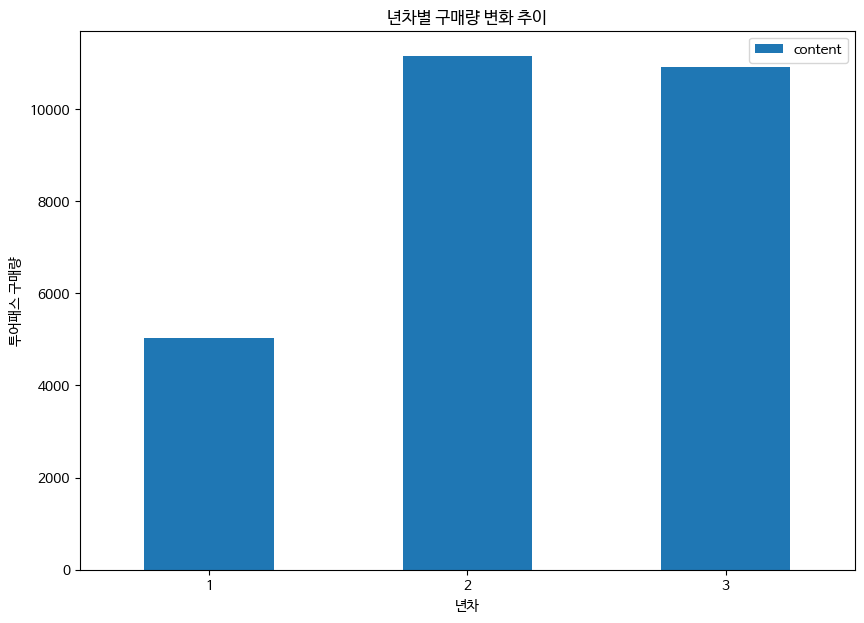

In [13]:
pivot_review_year = pd.pivot_table(pivot_review,index='year_count',values='content',aggfunc='sum')
ax = pivot_review_year.plot(kind='bar',  figsize=(10, 7))
plt.title('년차별 구매량 변화 추이')
plt.xlabel('년차')
plt.ylabel('투어패스 구매량')
plt.xticks(rotation=0)

plt.show()

## 월별 구매량 변화 추이
- 휴가가 많은 8월에 상당수 구매한 것을 확인

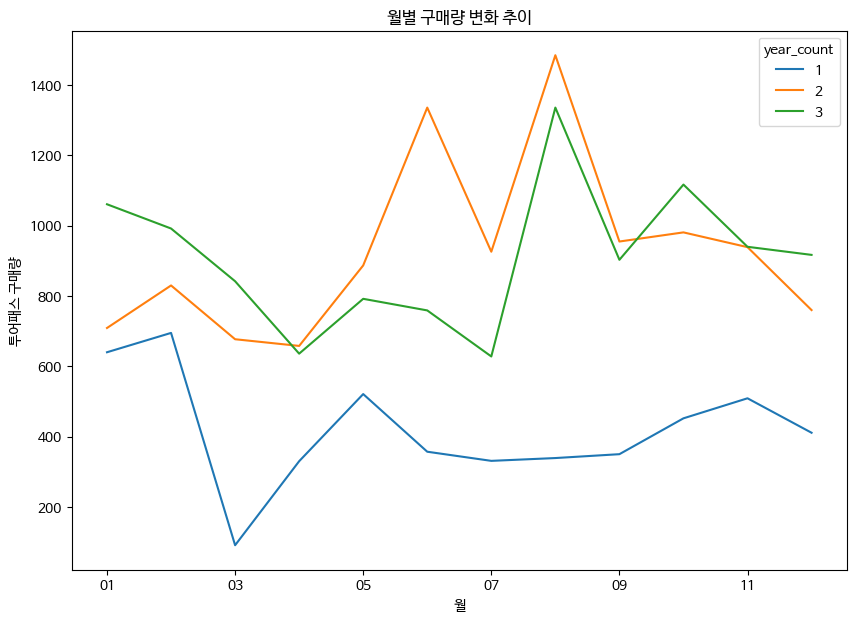

In [14]:
pivot_review_month = pd.pivot_table(pivot_review,index='month',columns='year_count',values='content',aggfunc='sum')
ax = pivot_review_month.plot(kind='line',  figsize=(10, 7))
plt.title('월별 구매량 변화 추이')
plt.xlabel('월')
plt.ylabel('투어패스 구매량')
plt.show()

In [16]:
# 텍스트 파일 경로
file_path = '../ratings.txt'

# 텍스트 파일 읽기
with open(file_path, 'r') as file:
    text_data = file.read()
import pandas as pd
from io import StringIO

# 텍스트 데이터를 파일 객체로 변환
file_obj = StringIO(text_data)

# 데이터프레임 생성
train_data = pd.read_csv(file_obj, sep='\t')

In [17]:
train_data

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
...,...,...,...
199995,8963373,포켓 몬스터 짜가 ㅡㅡ;;,0
199996,3302770,쓰.레.기,0
199997,5458175,완전 사이코영화. 마지막은 더욱더 이 영화의질을 떨어트린다.,0
199998,6908648,왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ,0


In [18]:
def replace(text):
    text = text.replace('/n',' ')
    return text

In [52]:
df_tour_pass_review.loc[:,'review_clean_okt'] = df_tour_pass_review['content'].apply(replace)
df_tour_pass_review['review_clean_okt']

6       여수첫방문은아니라 라테라스랑 테디베어박물관만가도 득이라고해서 여수사는 분이 추천하셔...
12      🤍 진짜 생각보다 완전 대박이에요!! 여수 여행가는 지인이 있다면 완전 추천할거 같...
30      여수 1박2일 여행동안 투어패스 덕에 알차게 즐겼습니다!\n가격이 올랐다는 리뷰를 ...
41      가고자했던곳은 분명패스권에는 오픈이였는데 가보니 닫혀있고... 수리중이고..카트는하...
42      진작 알았으면 좋았을텐데 여수여행 매년 가는편인데 이렇게 좋은 여수패스를 이제야 알...
                              ...                        
1028                                        아주 좋은 혜택들입니다!
1029                                         너무재미나게 놀았습니다
1030                                           아주좋아요아주좋아요
1036                                        유용하게 잘 사용했습니다
1037                                        저렴히 잘사서 잘썼어요!
Name: review_clean_okt, Length: 27092, dtype: object

In [20]:
from konlpy.tag import Okt
okt = Okt()
# 조사, 어미, 구두점 같은 것을 제거
def okt_clean(text):
    clean_text = []
    for word in okt.pos(text, stem=True):
        if word[1] in ['Adjective', 'Noun', 'Verb', 'Punctuation', 'KoreanParticle','Number']:
            clean_text.append(word[0])

    return " ".join(clean_text)

In [21]:
train_data['document'] = train_data['document'].astype(str)
train_data['review_clean_okt'] = train_data['document'].apply(okt_clean)
df_tour_pass_review['review_clean_okt'] = df_tour_pass_review['review_clean_okt'].apply(okt_clean)

# 학습, 테스트, 검증 데이터 분류

In [28]:
train_feature = train_data['review_clean_okt']
train_target = train_data['label']

In [29]:
# train, test 나누기
from sklearn.model_selection import train_test_split

feature_train, feature_test, target_train, target_test = train_test_split(train_feature, train_target, test_size=0.6, random_state=42)

# 벡터화하기

In [30]:
feature_train

100923    케빈 스 페이 시 , 줄리 앤 무어 .. 이름 당연하다 연기 말 하다 없다 원작 1...
117033                                      발화점 넘다 못 채 연소 .
179459                                         어이 아리마 셍 ㅎㅎㅎ
177925                                     미군 끄다 평점 높다 대세 ?
138125    결코 평점 9.83 짜다 리 절대 아니다 생각 하다 과 감히 1 점줌 ... 평점 ...
                                ...                        
119879                                      개다 리지 리지 마 변태 년
103694    지루하다 짜증나다 어지럽다 싱겁다 ... 재수 없다 불쾌하다 영화 .. 영화 부르다...
131932                         스크림 같다 영화 만들다 싶다 보다 택 없다 -_-
146867            제작비 탓 하다 빈약하다 각본 . 원작 살리다 채 이유 연결 되다 플롯 .
121958                                         재미없다 .......
Name: review_clean_okt, Length: 80000, dtype: object

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfVectorizer = TfidfVectorizer(use_idf=True,ngram_range=(1,2))
feature_train = tfidfVectorizer.fit_transform(feature_train)
feature_train.toarray()[:2]
dictionary_list = tfidfVectorizer.get_feature_names_out()
dictionary_list

array(['00', '00 00', '00 감독', ..., '힝힝 정말', '힣히히헤', '힣히히헤 헤헤'],
      dtype=object)

In [32]:
feature_test = tfidfVectorizer.transform(feature_test)

# 긍, 부정 분류 모델 선택하기
- 가장 높은 성능을 보인 SVC 선택

### randomforestclassifier

In [83]:
from sklearn.ensemble import RandomForestClassifier
classification_topic = RandomForestClassifier(n_jobs=-1)

In [84]:
classification_topic.fit(feature_train, target_train)

RandomForestClassifier(n_jobs=-1)

In [85]:
target_train_predict = classification_topic.predict(feature_train)

In [86]:
# classification_report로 model 성능 확인
from sklearn.metrics import classification_report
print(classification_report(target_train, target_train_predict))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     39869
           1       0.98      1.00      0.99     40131

    accuracy                           0.99     80000
   macro avg       0.99      0.99      0.99     80000
weighted avg       0.99      0.99      0.99     80000



In [87]:
target_test_predict = classification_topic.predict(feature_test)

In [88]:
from sklearn.metrics import classification_report
print(classification_report(target_test, target_test_predict))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82     60131
           1       0.81      0.82      0.82     59869

    accuracy                           0.82    120000
   macro avg       0.82      0.82      0.82    120000
weighted avg       0.82      0.82      0.82    120000



### logisticRegression

In [89]:
from sklearn import linear_model
logisticRegression=linear_model.LogisticRegression()

In [90]:
logisticRegression.fit(feature_train,target_train)

LogisticRegression()

In [91]:
target_train_predict = logisticRegression.predict(feature_train)

In [92]:
# classification_report로 model 성능 확인
from sklearn.metrics import classification_report
print(classification_report(target_train, target_train_predict))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91     39869
           1       0.92      0.89      0.90     40131

    accuracy                           0.91     80000
   macro avg       0.91      0.91      0.91     80000
weighted avg       0.91      0.91      0.91     80000



In [93]:
target_test_predict = logisticRegression.predict(feature_test)

In [94]:
from sklearn.metrics import classification_report
print(classification_report(target_test, target_test_predict))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83     60131
           1       0.84      0.82      0.83     59869

    accuracy                           0.83    120000
   macro avg       0.83      0.83      0.83    120000
weighted avg       0.83      0.83      0.83    120000



### randomforestclassifier

In [101]:
from sklearn.ensemble import RandomForestClassifier
classification_topic = RandomForestClassifier(n_jobs=-1)

In [102]:
classification_topic.fit(feature_train, target_train)

RandomForestClassifier(n_jobs=-1)

In [103]:
target_train_predict = classification_topic.predict(feature_train)

In [104]:
# classification_report로 model 성능 확인
from sklearn.metrics import classification_report
print(classification_report(target_train, target_train_predict))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     39869
           1       0.98      1.00      0.99     40131

    accuracy                           0.99     80000
   macro avg       0.99      0.99      0.99     80000
weighted avg       0.99      0.99      0.99     80000



In [105]:
target_test_predict = classification_topic.predict(feature_test)

In [106]:
from sklearn.metrics import classification_report
print(classification_report(target_test, target_test_predict))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82     60131
           1       0.81      0.82      0.82     59869

    accuracy                           0.82    120000
   macro avg       0.82      0.82      0.82    120000
weighted avg       0.82      0.82      0.82    120000



### K-Nearest Neighbors

In [107]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [108]:
knn.fit(feature_train, target_train)

KNeighborsClassifier()

In [109]:
target_train_predict = knn.predict(feature_train)

In [110]:
# classification_report로 model 성능 확인
from sklearn.metrics import classification_report
print(classification_report(target_train, target_train_predict))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72     39869
           1       0.72      0.74      0.73     40131

    accuracy                           0.73     80000
   macro avg       0.73      0.73      0.73     80000
weighted avg       0.73      0.73      0.73     80000



In [111]:
target_test_predict = knn.predict(feature_test)

In [112]:
from sklearn.metrics import classification_report
print(classification_report(target_test, target_test_predict))

              precision    recall  f1-score   support

           0       0.60      0.57      0.59     60131
           1       0.59      0.61      0.60     59869

    accuracy                           0.59    120000
   macro avg       0.59      0.59      0.59    120000
weighted avg       0.59      0.59      0.59    120000



### Support Vector Machine

In [33]:
from sklearn import svm
svm_model = svm.SVC()

In [34]:
svm_model.fit(feature_train, target_train)

SVC()

In [35]:
target_train_predict = svm_model.predict(feature_train)

In [36]:
# classification_report로 model 성능 확인
from sklearn.metrics import classification_report
print(classification_report(target_train, target_train_predict))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     39869
           1       0.97      0.98      0.97     40131

    accuracy                           0.97     80000
   macro avg       0.97      0.97      0.97     80000
weighted avg       0.97      0.97      0.97     80000



In [37]:
target_test_predict = svm_model.predict(feature_test)

In [38]:
from sklearn.metrics import classification_report
print(classification_report(target_test, target_test_predict))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84     60131
           1       0.83      0.85      0.84     59869

    accuracy                           0.84    120000
   macro avg       0.84      0.84      0.84    120000
weighted avg       0.84      0.84      0.84    120000



# 투어패스 구매후기 데이터에 적용

In [40]:
features=tfidfVectorizer.transform(df_tour_pass_review['review_clean_okt'])

In [41]:
df_tour_pass_review['goodorbad'] = svm_model.predict(features)

In [42]:
df_tour_pass_review['goodorbad'].value_counts()

goodorbad
1    21308
0     5784
Name: count, dtype: int64

In [50]:
df_tour_pass_review.query("goodorbad ==0")

,_id,title,region,rating,date,content,date_format,year,month,year_count,review_clean_okt,goodorbad
41,663dea3c06635b047a688c7e,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,1,24.02.21.,가고자했던곳은 분명패스권에는 오픈이였는데 가보니 닫혀있고... 수리중이고..카트는하...,202402,2024,02,3,가다 하다 곳 분명 패스 오픈 이다 가보다 닫히다 ... 수리 .. 카트 늘다 .....,0
63,663dea3e06635b047a688c94,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,5,24.02.23.,여수여행 가서 잘 사용 하고 왔어요 \n.\n몰랐던 맛집 명소 구경 하기 좋았어요.,202402,2024,02,3,여수 여행 가다 자다 사용 하다 오다 \ .\ 모르다 맛집 명소 구경 하다 좋다 .,0
71,663dea3e06635b047a688c9c,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,5,24.01.12.,저렴한 가격으로 여수 여기저기 탐방이 가능해서 너무 좋았어요! 이거 몰랐울땐 계획짤...,202401,2024,01,3,저렴하다 가격 여수 여기저기 탐방 가능하다 좋다 ! 거 모르다 땐 계획 때 어디가 ...,0
79,663dea3e06635b047a688ca4,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,5,24.02.01.,여수패스로 배고타고 딸기모찌도 각 가게에서 한구씩 먹고 시래기국도 받아왔는데 생각보...,202402,2024,02,3,패스 배다 타고 딸기모찌 각 가게 한구 먹다 시래기 국도 받다 오다 생각 갓 시래기...,0
83,663dea4006635b047a688ca8,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,5,24.01.08.,여수 라테라스랑 테디베어뮤지엄만 가도 뽕뽑아요! 낮에 테디베어뮤지엄에서 한 세시간동...,202401,2024,01,3,여수 라테라 스랑 테디베어 뮤 지엄 가도 뽕 뽑다 ! 낮 테디베어 뮤 지엄 하다 시...,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1026,663edbfa985956deccdaa4f8,[주말에어디가] 강릉프리패스 강릉투어패스\n단독특가,강원,4,24.02.17.,시간이 없어서 다 못 들려서 아쉽지만..\n커피랑 이곳저곳 투어패스로 다녀서 좋았어요,202402,2024,02,3,시간 없다 못 들다 아쉽다 .. 커피 곳 곳 투어 패스 다니다 좋다,0
1027,663edbfa985956deccdaa4f9,[주말에어디가] 강릉프리패스 강릉투어패스\n단독특가,강원,3,23.12.24.,여러투어패스를 써봤지만 1시간에 한번씩 쓰게 만든건 너무 불편했어요,202312,2023,12,3,투어 패스 써다 보다 1시간 한번 쓰다 만들다 불편하다,0
1029,663edbfa985956deccdaa4fb,[주말에어디가] 강릉프리패스 강릉투어패스\n단독특가,강원,5,23.12.05.,너무재미나게 놀았습니다,202312,2023,12,3,재미나 놀다,0
1036,663edc18bd57e89361e03562,[주말에어디가] 강릉N투어패스\n무료 혜택 제공 시설로만\n이루어진 부담없는 강릉여행,강원,5,24.02.27.,유용하게 잘 사용했습니다,202402,2024,02,3,유용하다 자다 사용 하다,0


# 결론
- 모델링 데이터가 해당 데이터와 달라서 분류가 제대로 되지 않음